In [4]:
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import statistics as st
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.distributions.empirical_distribution import ECDF
from TimeSerie_fct import create_monthly_avg_time_serie
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import acf, pacf
import os


data_temperature = pd.read_table('../data/observatoire-geneve/TG_STAID000241.txt',sep = ',',
                                names = ['SOUID','DATE','TG','Q_TG'], skiprows = range(0,20))

data_temperature.drop(data_temperature[ data_temperature['Q_TG'] == 9 ].index, inplace = True)
data_temperature['Year'] = [int(str(d)[:4]) for d in data_temperature.DATE]
data_temperature['Month'] = [int(str(d)[4:6]) for d in data_temperature.DATE]
data_temperature['Day'] = [int(str(d)[6:8]) for d in data_temperature.DATE]

#Compute the day of the year for each year
day_of_year = np.array(len(data_temperature['Day']))

adate = [datetime.strptime(str(date),"%Y%m%d") for date in data_temperature.DATE]
data_temperature['Day_of_year'] = [d.timetuple().tm_yday for d in adate]
data_temperature.TG = data_temperature.TG/10.

In [5]:
df = data_temperature.copy()
plt.style.use("ggplot")

In [24]:
# Transformation en moyenne mesuelle
Years = df.Year.unique()
Months = df.Month.unique()
data_M = pd.DataFrame(np.array([[df[(df.Year == y)&(df.Month==m)].TG.mean(),
                        df[(df.Year == y)&(df.Month==m)].TG.median(),df[(df.Year == y)&(df.Month==m)].TG.std()
                                 ,y,int(m)] for y in Years for m in Months]),
                     columns=["Mean","Median","Std","Years","Month"])
data_M = data_M.dropna()

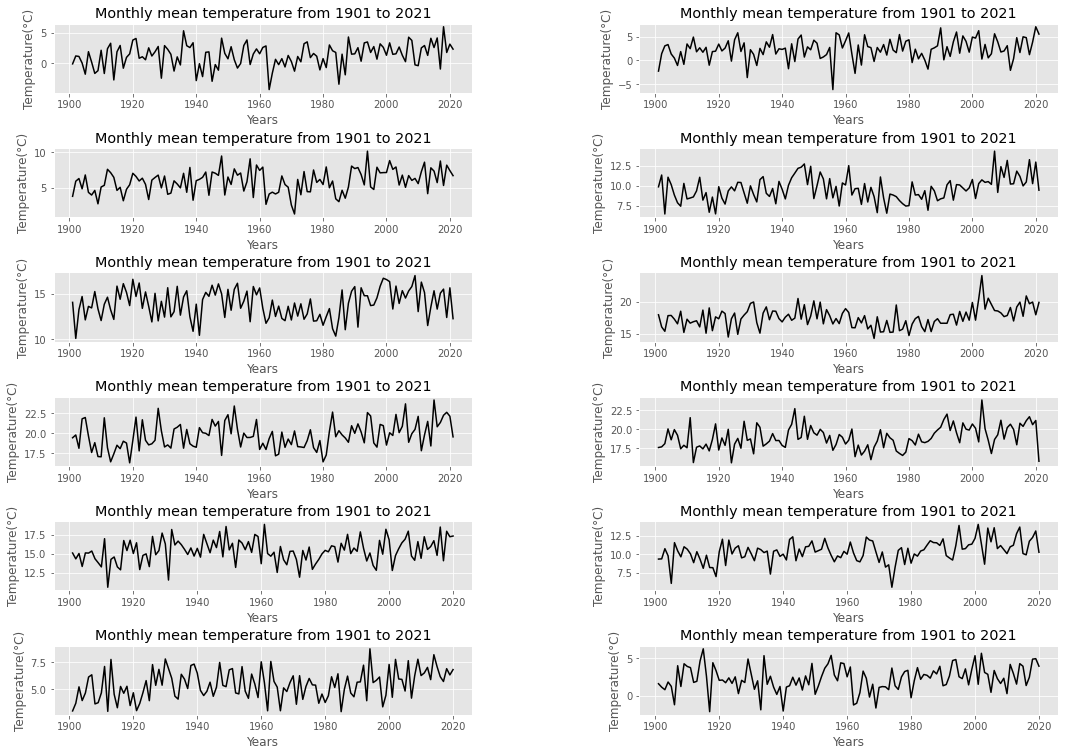

In [64]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(6,2,figsize=(18,12))
axs = (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12)
for m in Months:
    Y = data_M[data_M.Month == m].Years.unique()
    axs[m-1].plot(Y,data_M[data_M.Month==m].Mean, color = 'k')
    axs[m-1].set_title("Monthly mean temperature from 1901 to 2021")
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)

    axs[m-1].set(xlabel="Years",ylabel="Temperature(°C)")


plt.savefig("figure/Monthly_mean_median_std.png", dpi=300, bbox_inches='tight')
#plt.close(fig)

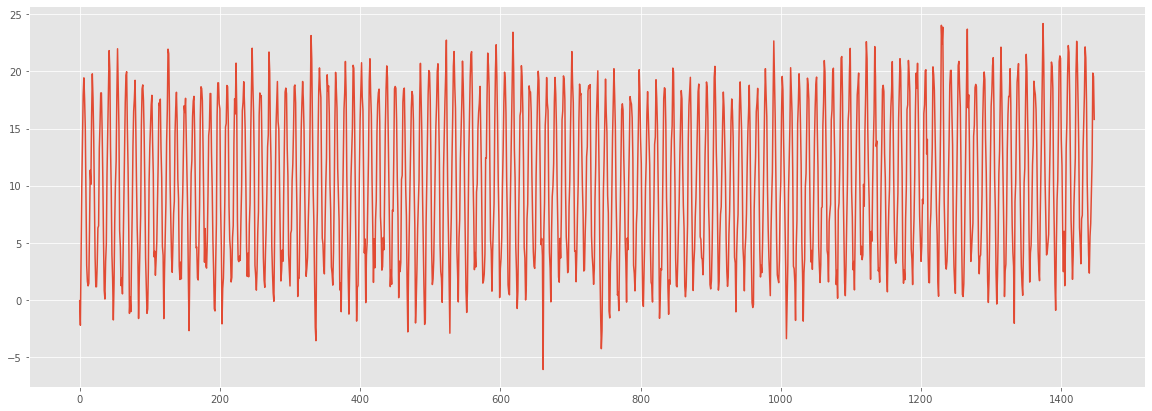

In [66]:
plt.figure(figsize = (20,7))
plt.plot(data_M.Mean)